In [372]:
# import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [373]:
df=pd.read_csv(r"D:\Subjects\2nd semester\miniproject\dataset\dataset\main_data.csv")

C:\Users\SOUGATA\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3135: DtypeWarning: Columns (82,83,85) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [374]:
df['Label'].value_counts()

DoS attacks-SlowHTTPTest    2000
DoS attacks-GoldenEye       2000
DoS attacks-Slowloris       2000
Infilteration               2000
FTP-BruteForce              2000
DoS attacks-Hulk            2000
SSH-Bruteforce              2000
Benign                      2000
DDoS attacks-LOIC-HTTP      2000
Name: Label, dtype: int64

In [375]:
df

,Unnamed: 0,Unnamed: 0.1,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,...,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Flow ID,Src IP,Src Port,Dst IP
0,0,0,0,0,14/02/2018 08:31:01,112641719,3,0,0.0,0.0,...,0.0,56320859.5,139.300036,56320958.0,56320761.0,Benign,NaN,NaN,NaN,NaN
1,1,1,0,0,14/02/2018 08:33:50,112641466,3,0,0.0,0.0,...,0.0,56320733.0,114.551299,56320814.0,56320652.0,Benign,NaN,NaN,NaN,NaN
2,2,2,0,0,14/02/2018 08:36:39,112638623,3,0,0.0,0.0,...,0.0,56319311.5,301.934596,56319525.0,56319098.0,Benign,NaN,NaN,NaN,NaN
3,3,3,22,6,14/02/2018 08:40:13,6453966,15,10,1239.0,2273.0,...,0.0,0.0,0.000000,0.0,0.0,Benign,NaN,NaN,NaN,NaN
4,4,4,22,6,14/02/2018 08:40:23,8804066,14,11,1143.0,2209.0,...,0.0,0.0,0.000000,0.0,0.0,Benign,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,17995,386006,80,6,28/02/2018 01:57:55,173,2,0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,Infilteration,NaN,NaN,NaN,NaN
17996,17996,386007,80,6,28/02/2018 01:57:55,24019,3,5,428.0,2267.0,...,0.0,0.0,0.000000,0.0,0.0,Infilteration,NaN,NaN,NaN,NaN
17997,17997,386008,80,6,28/02/2018 01:57:55,187,2,0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,Infilteration,NaN,NaN,NaN,NaN
17998,17998,386009,443,6,28/02/2018 01:57:55,82741,6,6,1485.0,3363.0,...,0.0,0.0,0.000000,0.0,0.0,Infilteration,NaN,NaN,NaN,NaN


In [376]:
df.isnull().sum()

Unnamed: 0          0
Unnamed: 0.1        0
Dst Port            0
Protocol            0
Timestamp           0
                ...  
Label               0
Flow ID         16000
Src IP          16000
Src Port        16000
Dst IP          16000
Length: 86, dtype: int64

In [377]:
df=df. dropna(axis=1) 

In [378]:
df



,Unnamed: 0,Unnamed: 0.1,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,0,0,14/02/2018 08:31:01,112641719,3,0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,56320859.5,139.300036,56320958.0,56320761.0,Benign
1,1,1,0,0,14/02/2018 08:33:50,112641466,3,0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,56320733.0,114.551299,56320814.0,56320652.0,Benign
2,2,2,0,0,14/02/2018 08:36:39,112638623,3,0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,56319311.5,301.934596,56319525.0,56319098.0,Benign
3,3,3,22,6,14/02/2018 08:40:13,6453966,15,10,1239.0,2273.0,...,32,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,Benign
4,4,4,22,6,14/02/2018 08:40:23,8804066,14,11,1143.0,2209.0,...,32,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,17995,386006,80,6,28/02/2018 01:57:55,173,2,0,0.0,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,Infilteration
17996,17996,386007,80,6,28/02/2018 01:57:55,24019,3,5,428.0,2267.0,...,20,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,Infilteration
17997,17997,386008,80,6,28/02/2018 01:57:55,187,2,0,0.0,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,Infilteration
17998,17998,386009,443,6,28/02/2018 01:57:55,82741,6,6,1485.0,3363.0,...,20,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,Infilteration


In [379]:
df.drop("Unnamed: 0.1", axis=1, inplace=True)

C:\Users\SOUGATA\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [380]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [381]:
df.drop("Timestamp", axis=1, inplace=True)

In [382]:
df2=df['Label']

In [383]:
#replacing nan and infinity values
df.replace([np.inf, -np.inf, np.nan], -1, inplace=True) 

C:\Users\SOUGATA\anaconda3\lib\site-packages\pandas\core\frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [384]:
df.drop("Label",axis=1, inplace=True)

In [385]:
X=df

In [386]:
X

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,0,0,112641719,3,0,0.0,0.0,0.0,0.0,0.000000,...,0,0,0.0,0.0,0.0,0.0,56320859.5,139.300036,56320958.0,56320761.0
1,0,0,112641466,3,0,0.0,0.0,0.0,0.0,0.000000,...,0,0,0.0,0.0,0.0,0.0,56320733.0,114.551299,56320814.0,56320652.0
2,0,0,112638623,3,0,0.0,0.0,0.0,0.0,0.000000,...,0,0,0.0,0.0,0.0,0.0,56319311.5,301.934596,56319525.0,56319098.0
3,22,6,6453966,15,10,1239.0,2273.0,744.0,0.0,82.600000,...,6,32,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,22,6,8804066,14,11,1143.0,2209.0,744.0,0.0,81.642857,...,6,32,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,80,6,173,2,0,0.0,0.0,0.0,0.0,0.000000,...,0,20,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
17996,80,6,24019,3,5,428.0,2267.0,428.0,0.0,142.666667,...,1,20,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
17997,80,6,187,2,0,0.0,0.0,0.0,0.0,0.000000,...,0,20,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
17998,443,6,82741,6,6,1485.0,3363.0,842.0,0.0,247.500000,...,3,20,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [387]:
# Data-preprocessing: Standardizing the data
from sklearn.preprocessing import StandardScaler
 
standardized_data = StandardScaler().fit_transform(X)
print(standardized_data.shape)

(18000, 77)


In [388]:
df2

0               Benign
1               Benign
2               Benign
3               Benign
4               Benign
             ...      
17995    Infilteration
17996    Infilteration
17997    Infilteration
17998    Infilteration
17999    Infilteration
Name: Label, Length: 18000, dtype: object

In [389]:
X1=X

In [390]:
# Scale data before applying PCA
scaling=StandardScaler()
 
# Use fit and transform method
scaling.fit(X1)
Scaled_data=scaling.transform(X1)

In [391]:

 
# Set the n_components=20
principal=PCA(n_components=77)
principal.fit(Scaled_data)
x=principal.transform(Scaled_data)
 
# Check the dimensions of data after PCA
print(x.shape)

(18000, 77)


In [392]:
print(principal.explained_variance_ratio_)

[2.59378438e-01 2.07471162e-01 1.07894389e-01 5.54206013e-02
 5.32353540e-02 4.56766651e-02 3.69880215e-02 3.28193794e-02
 3.00982338e-02 2.73470573e-02 2.55233566e-02 2.08900433e-02
 1.50958440e-02 1.46643386e-02 1.36621926e-02 1.07580076e-02
 8.08562087e-03 6.71659082e-03 5.52161717e-03 5.29978087e-03
 3.77066814e-03 2.64721012e-03 2.16731180e-03 1.81620153e-03
 1.75552139e-03 1.33754402e-03 9.20420457e-04 8.05601141e-04
 7.45974636e-04 3.35907958e-04 2.70743638e-04 1.83380804e-04
 1.33542017e-04 1.02232383e-04 9.05988711e-05 7.74081384e-05
 5.95235306e-05 4.74184649e-05 3.58131432e-05 3.51248082e-05
 2.95998909e-05 2.62653522e-05 1.51703804e-05 1.40500684e-05
 9.31294805e-06 5.44609025e-06 4.67834730e-06 3.45553554e-06
 2.32613791e-06 1.53639698e-06 1.17957141e-06 7.61823952e-07
 5.82835361e-07 4.71221630e-07 1.18542515e-07 1.03808137e-07
 6.61849318e-08 3.36038602e-08 7.99494926e-17 3.69075944e-29
 7.23830344e-30 1.01047239e-30 6.28202082e-31 5.31287568e-31
 2.58812645e-31 1.488664

In [393]:
import matplotlib.pyplot as plt


Text(0.5, 0, 'no of components')

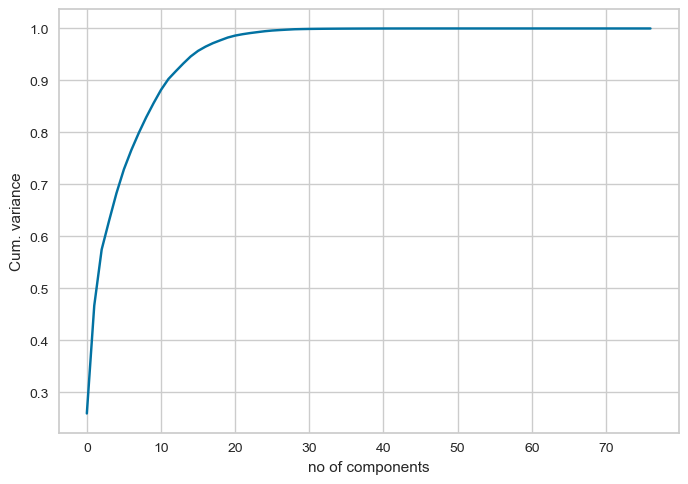

In [394]:
plt.plot(np.cumsum(principal.explained_variance_ratio_))
plt.ylabel("Cum. variance")
plt.xlabel("no of components")

In [395]:
# Set the n_components=20
principal1=PCA(n_components=20)
principal1.fit(Scaled_data)
x1=principal1.transform(Scaled_data)
 
# Check the dimensions of data after PCA
print(x1.shape)

(18000, 20)


In [396]:
import matplotlib.pyplot as plt
%matplotlib inline

In [397]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df3= label_encoder.fit_transform(df2)
  
#df3.unique()

In [398]:
new_df = pd.DataFrame(data = x1
             , columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4','principal component 5','principal component 6','principal component 7','principal component 8','principal component 9','principal component 10','principal component 11','principal component 12','principal component 13','principal component 14','principal component 15','principal component 16','principal component 17','principal component 18','principal component 19','principal component 20'])

In [399]:
new_df

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,principal component 11,principal component 12,principal component 13,principal component 14,principal component 15,principal component 16,principal component 17,principal component 18,principal component 19,principal component 20
0,-5.744986,2.226942,-0.528293,4.064464,0.679772,-3.150698,-2.515702,-4.227338,2.800001,8.047461,-5.212193,4.500988,0.807829,0.277053,0.486100,-0.042174,-0.680727,0.348443,-0.281330,0.529894
1,-5.744974,2.226933,-0.528289,4.064447,0.679772,-3.150706,-2.515703,-4.227342,2.799987,8.047448,-5.212185,4.500980,0.807843,0.277040,0.486100,-0.042182,-0.680728,0.348423,-0.281359,0.529876
2,-5.744843,2.226849,-0.528272,4.064505,0.679808,-3.150623,-2.515628,-4.227196,2.800027,8.047288,-5.212057,4.500824,0.807714,0.277148,0.486097,-0.042118,-0.680688,0.348579,-0.281115,0.529913
3,2.872290,0.721476,-0.831673,0.059500,-1.262817,0.514340,-1.059579,0.648816,-0.204477,-1.229541,-2.359724,-0.132450,0.318853,0.116004,-0.449963,-0.952201,0.503163,-0.040677,0.367913,-0.005894
4,2.253276,0.924768,-1.007281,0.220699,0.110543,-0.366253,-0.696050,0.111551,0.285807,-0.544676,-1.063681,-0.745649,0.469960,0.203949,0.094653,-0.811084,0.515167,-0.622178,0.491483,0.049431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,-0.220160,-1.784626,1.648458,0.518872,0.933024,-0.806045,-1.351004,0.016745,0.524369,-0.552169,-1.102811,-0.984427,0.300138,0.329270,-0.026501,0.242634,0.134578,-0.100492,0.143601,0.175478
17996,4.090135,1.506715,-5.761070,-0.589509,-0.110637,-0.329459,1.377530,-0.705039,-0.886089,0.567888,0.879102,0.330132,0.312145,0.481131,1.106271,-0.594754,0.341024,-0.336502,0.237666,0.146040
17997,-0.720099,-1.569791,1.327256,0.664472,2.430045,-1.763015,-0.840535,-0.544041,1.050706,0.143551,0.211107,-1.638209,0.504472,0.416569,0.538561,0.284889,0.098576,-0.781465,0.299217,0.266608
17998,4.892502,2.448518,-6.290957,-0.733259,-0.178686,-0.125754,1.577458,-0.451769,-0.777586,0.466613,0.748717,0.576930,0.849001,0.908863,1.355388,-0.876481,0.475246,-0.609864,0.145532,0.196160


In [400]:
new_df.to_csv(r"D:\Subjects\2nd semester\miniproject\dataset\dataset\pca.csv")

In [401]:
final_df=pd.concat([new_df,df2],axis=1)

In [402]:
final_df

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,...,principal component 12,principal component 13,principal component 14,principal component 15,principal component 16,principal component 17,principal component 18,principal component 19,principal component 20,Label
0,-5.744986,2.226942,-0.528293,4.064464,0.679772,-3.150698,-2.515702,-4.227338,2.800001,8.047461,...,4.500988,0.807829,0.277053,0.486100,-0.042174,-0.680727,0.348443,-0.281330,0.529894,Benign
1,-5.744974,2.226933,-0.528289,4.064447,0.679772,-3.150706,-2.515703,-4.227342,2.799987,8.047448,...,4.500980,0.807843,0.277040,0.486100,-0.042182,-0.680728,0.348423,-0.281359,0.529876,Benign
2,-5.744843,2.226849,-0.528272,4.064505,0.679808,-3.150623,-2.515628,-4.227196,2.800027,8.047288,...,4.500824,0.807714,0.277148,0.486097,-0.042118,-0.680688,0.348579,-0.281115,0.529913,Benign
3,2.872290,0.721476,-0.831673,0.059500,-1.262817,0.514340,-1.059579,0.648816,-0.204477,-1.229541,...,-0.132450,0.318853,0.116004,-0.449963,-0.952201,0.503163,-0.040677,0.367913,-0.005894,Benign
4,2.253276,0.924768,-1.007281,0.220699,0.110543,-0.366253,-0.696050,0.111551,0.285807,-0.544676,...,-0.745649,0.469960,0.203949,0.094653,-0.811084,0.515167,-0.622178,0.491483,0.049431,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,-0.220160,-1.784626,1.648458,0.518872,0.933024,-0.806045,-1.351004,0.016745,0.524369,-0.552169,...,-0.984427,0.300138,0.329270,-0.026501,0.242634,0.134578,-0.100492,0.143601,0.175478,Infilteration
17996,4.090135,1.506715,-5.761070,-0.589509,-0.110637,-0.329459,1.377530,-0.705039,-0.886089,0.567888,...,0.330132,0.312145,0.481131,1.106271,-0.594754,0.341024,-0.336502,0.237666,0.146040,Infilteration
17997,-0.720099,-1.569791,1.327256,0.664472,2.430045,-1.763015,-0.840535,-0.544041,1.050706,0.143551,...,-1.638209,0.504472,0.416569,0.538561,0.284889,0.098576,-0.781465,0.299217,0.266608,Infilteration
17998,4.892502,2.448518,-6.290957,-0.733259,-0.178686,-0.125754,1.577458,-0.451769,-0.777586,0.466613,...,0.576930,0.849001,0.908863,1.355388,-0.876481,0.475246,-0.609864,0.145532,0.196160,Infilteration


In [403]:
final_X = final_df.drop(labels=['Label'],axis=1)

In [404]:
y=final_df['Label'].values

In [405]:
final_X

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,principal component 11,principal component 12,principal component 13,principal component 14,principal component 15,principal component 16,principal component 17,principal component 18,principal component 19,principal component 20
0,-5.744986,2.226942,-0.528293,4.064464,0.679772,-3.150698,-2.515702,-4.227338,2.800001,8.047461,-5.212193,4.500988,0.807829,0.277053,0.486100,-0.042174,-0.680727,0.348443,-0.281330,0.529894
1,-5.744974,2.226933,-0.528289,4.064447,0.679772,-3.150706,-2.515703,-4.227342,2.799987,8.047448,-5.212185,4.500980,0.807843,0.277040,0.486100,-0.042182,-0.680728,0.348423,-0.281359,0.529876
2,-5.744843,2.226849,-0.528272,4.064505,0.679808,-3.150623,-2.515628,-4.227196,2.800027,8.047288,-5.212057,4.500824,0.807714,0.277148,0.486097,-0.042118,-0.680688,0.348579,-0.281115,0.529913
3,2.872290,0.721476,-0.831673,0.059500,-1.262817,0.514340,-1.059579,0.648816,-0.204477,-1.229541,-2.359724,-0.132450,0.318853,0.116004,-0.449963,-0.952201,0.503163,-0.040677,0.367913,-0.005894
4,2.253276,0.924768,-1.007281,0.220699,0.110543,-0.366253,-0.696050,0.111551,0.285807,-0.544676,-1.063681,-0.745649,0.469960,0.203949,0.094653,-0.811084,0.515167,-0.622178,0.491483,0.049431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,-0.220160,-1.784626,1.648458,0.518872,0.933024,-0.806045,-1.351004,0.016745,0.524369,-0.552169,-1.102811,-0.984427,0.300138,0.329270,-0.026501,0.242634,0.134578,-0.100492,0.143601,0.175478
17996,4.090135,1.506715,-5.761070,-0.589509,-0.110637,-0.329459,1.377530,-0.705039,-0.886089,0.567888,0.879102,0.330132,0.312145,0.481131,1.106271,-0.594754,0.341024,-0.336502,0.237666,0.146040
17997,-0.720099,-1.569791,1.327256,0.664472,2.430045,-1.763015,-0.840535,-0.544041,1.050706,0.143551,0.211107,-1.638209,0.504472,0.416569,0.538561,0.284889,0.098576,-0.781465,0.299217,0.266608
17998,4.892502,2.448518,-6.290957,-0.733259,-0.178686,-0.125754,1.577458,-0.451769,-0.777586,0.466613,0.748717,0.576930,0.849001,0.908863,1.355388,-0.876481,0.475246,-0.609864,0.145532,0.196160


In [406]:
from sklearn import preprocessing

In [407]:
le = preprocessing.LabelEncoder()

In [408]:
final_y=le.fit_transform(y)

In [409]:
# split the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    final_X, final_y, test_size=0.2, random_state=0)

In [410]:
X_train

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,principal component 11,principal component 12,principal component 13,principal component 14,principal component 15,principal component 16,principal component 17,principal component 18,principal component 19,principal component 20
2465,0.084624,-2.984936,3.900363,-0.568680,-2.733136,2.407774,1.914124,-0.477863,-0.055046,1.691718,1.028765,0.331677,0.497699,0.189230,-0.071733,-1.014130,0.434548,-0.513012,0.363032,0.472732
8461,-11.724745,6.219531,-0.431389,-0.843632,-0.142834,-0.078879,1.296739,-0.052575,-0.397156,-0.709036,-0.274547,-0.155581,-0.149693,-0.118340,-0.145129,0.061278,0.123400,-0.038639,0.023342,-0.044080
13734,0.100893,-2.300433,2.315016,-0.189993,-1.097346,0.761605,0.227623,-0.062641,-0.047310,0.038261,-0.128577,0.103875,-0.303223,-0.200215,-0.127225,0.609835,-0.059292,0.020190,-0.118009,-0.293728
965,-0.743781,-1.768897,2.010997,0.015862,3.113922,-2.914784,0.417932,2.407915,0.536149,-1.144482,3.224748,4.602241,-0.465587,-0.329814,-0.382233,0.390853,-0.988585,-0.474310,0.251947,0.014668
4615,2.660025,1.081676,0.072549,0.328928,-0.155072,-0.182302,-0.847562,0.370029,0.452610,-0.760108,-1.654869,-0.898477,-0.027708,-0.554614,-0.533672,-0.992123,0.225858,-0.209031,0.377181,-0.068768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9225,-1.825806,-1.446893,2.823797,-0.632602,1.120185,-0.246519,2.306588,-0.107614,0.194074,0.598906,1.406036,-1.366474,1.581810,1.351457,1.359058,-1.489987,-1.704976,1.699742,-0.569738,-0.134961
13123,0.100893,-2.300433,2.315016,-0.189993,-1.097346,0.761605,0.227623,-0.062641,-0.047310,0.038261,-0.128577,0.103875,-0.303223,-0.200215,-0.127225,0.609835,-0.059292,0.020190,-0.118009,-0.293728
9845,-11.724810,6.219577,-0.431403,-0.843635,-0.142850,-0.078870,1.296740,-0.052577,-0.397160,-0.709036,-0.274552,-0.155572,-0.149700,-0.118347,-0.145139,0.061281,0.123415,-0.038653,0.023348,-0.044076
10799,2.480594,0.193903,-1.667499,-0.420706,-0.596552,0.096791,-0.031562,0.141241,-0.633081,-1.071270,-1.041976,0.713198,0.405817,0.781214,0.564310,0.101002,-0.196268,-0.090314,0.098127,0.237606


In [411]:
from yellowbrick.classifier import *
#import ROCAUC

def plot_ROC_curve(model, xtrain, ytrain, xtest, ytest):

    # Creating visualization with the readable labels
    visualizer = ROCAUC(clf, encoder={0:'DoS attacks-GoldenEye',1:'DoS attacks-SlowHTTPTest',2:'Infilteration',3:'FTP-BruteForce',4:'SSH-Bruteforce',5:'DoS attacks-Hulk',6:'DoS attacks-Slowloris',7:'DDoS attacks-LOIC-HTTP',
                                        8:'Benign' })
                                        
    # Fitting to the training data first then scoring with the test data                                    
    visualizer.fit(xtrain, ytrain)
    visualizer.score(xtest, ytest)
    visualizer.show()
    
    return visualizer

In [412]:
from sklearn.ensemble import RandomForestClassifier

In [413]:
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
ranforest=OneVsRestClassifier(RandomForestClassifier())
ranforest.fit(X_train, y_train)

OneVsRestClassifier(estimator=RandomForestClassifier())

In [414]:

y_pred = ranforest.predict(X_test)
 



In [415]:
from sklearn import metrics 
# for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

ACCURACY OF THE MODEL:  0.9330555555555555


In [416]:
from sklearn.metrics import classification_report

In [417]:
target_names = ['DoS attacks-GoldenEye','DoS attacks-SlowHTTPTest','Infilteration','FTP-BruteForce','SSH-Bruteforce','DoS attacks-Hulk','DoS attacks-Slowloris','DDoS attacks-LOIC-HTTP','Benign']

In [418]:
print(classification_report(y_test, y_pred, target_names=target_names))

                          precision    recall  f1-score   support

   DoS attacks-GoldenEye       1.00      0.99      0.99       408
DoS attacks-SlowHTTPTest       1.00      1.00      1.00       420
           Infilteration       1.00      1.00      1.00       420
          FTP-BruteForce       1.00      1.00      1.00       405
          SSH-Bruteforce       0.63      0.96      0.76       392
        DoS attacks-Hulk       1.00      1.00      1.00       369
   DoS attacks-Slowloris       0.90      0.42      0.57       376
  DDoS attacks-LOIC-HTTP       0.99      1.00      1.00       408
                  Benign       1.00      1.00      1.00       402

                accuracy                           0.93      3600
               macro avg       0.95      0.93      0.92      3600
            weighted avg       0.95      0.93      0.93      3600



In [419]:
from sklearn.metrics import confusion_matrix,f1_score, precision_score,recall_score
cf_matrix =confusion_matrix(y_test,y_pred)


In [420]:
cf_matrix

array([[404,   0,   1,   0,   0,   0,   0,   3,   0],
       [  0, 420,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 420,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 405,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 375,   0,  17,   0,   0],
       [  0,   0,   0,   0,   0, 369,   0,   0,   0],
       [  0,   0,   0,   0, 218,   0, 158,   0,   0],
       [  1,   0,   0,   0,   0,   0,   0, 407,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 402]], dtype=int64)

In [421]:
from yellowbrick.classifier import *
#import ROCAUC

def plot_ROC_curve(model, xtrain, ytrain, xtest, ytest):

    # Creating visualization with the readable labels
    visualizer = ROCAUC(model, encoder={0:'DoS attacks-GoldenEye',1:'DoS attacks-SlowHTTPTest',2:'Infilteration',3:'FTP-BruteForce',4:'SSH-Bruteforce',5:'DoS attacks-Hulk',6:'DoS attacks-Slowloris',7:'DDoS attacks-LOIC-HTTP',
                                        8:'Benign' })
                                        
    # Fitting to the training data first then scoring with the test data                                    
    visualizer.fit(xtrain, ytrain)
    visualizer.score(xtest, ytest)
    visualizer.show()
    
    return visualizer

C:\Users\SOUGATA\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


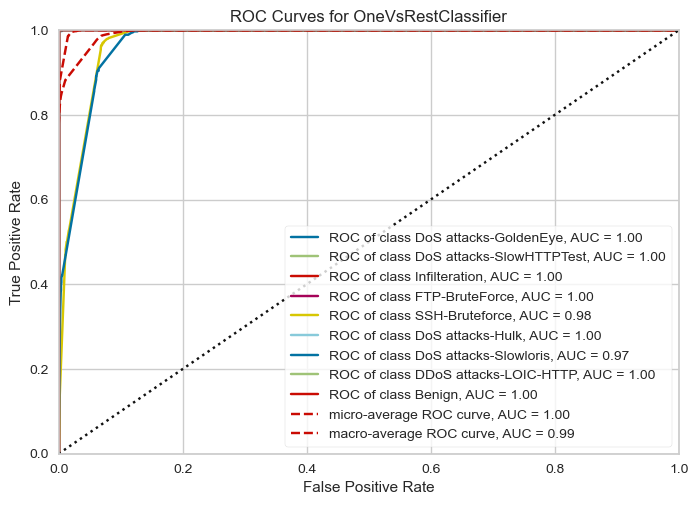

ROCAUC(ax=<AxesSubplot:title={'center':'ROC Curves for OneVsRestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       encoder={0: 'DoS attacks-GoldenEye', 1: 'DoS attacks-SlowHTTPTest',
                2: 'Infilteration', 3: 'FTP-BruteForce', 4: 'SSH-Bruteforce',
                5: 'DoS attacks-Hulk', 6: 'DoS attacks-Slowloris',
                7: 'DDoS attacks-LOIC-HTTP', 8: 'Benign'},
       estimator=OneVsRestClassifier(estimator=RandomForestClassifier()))

In [422]:
plot_ROC_curve(ranforest,X_train, y_train, X_test, y_test)

In [423]:
import seaborn as sns
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cf_matrix,
                     index = ['DoS attacks-GoldenEye','DoS attacks-SlowHTTPTest','Infilteration','FTP-BruteForce','SSH-Bruteforce','DoS attacks-Hulk','DoS attacks-Slowloris','DDoS attacks-LOIC-HTTP','Benign'], 
                     columns = ['DoS attacks-GoldenEye','DoS attacks-SlowHTTPTest','Infilteration','FTP-BruteForce','SSH-Bruteforce','DoS attacks-Hulk','DoS attacks-Slowloris','DDoS attacks-LOIC-HTTP','Benign'])

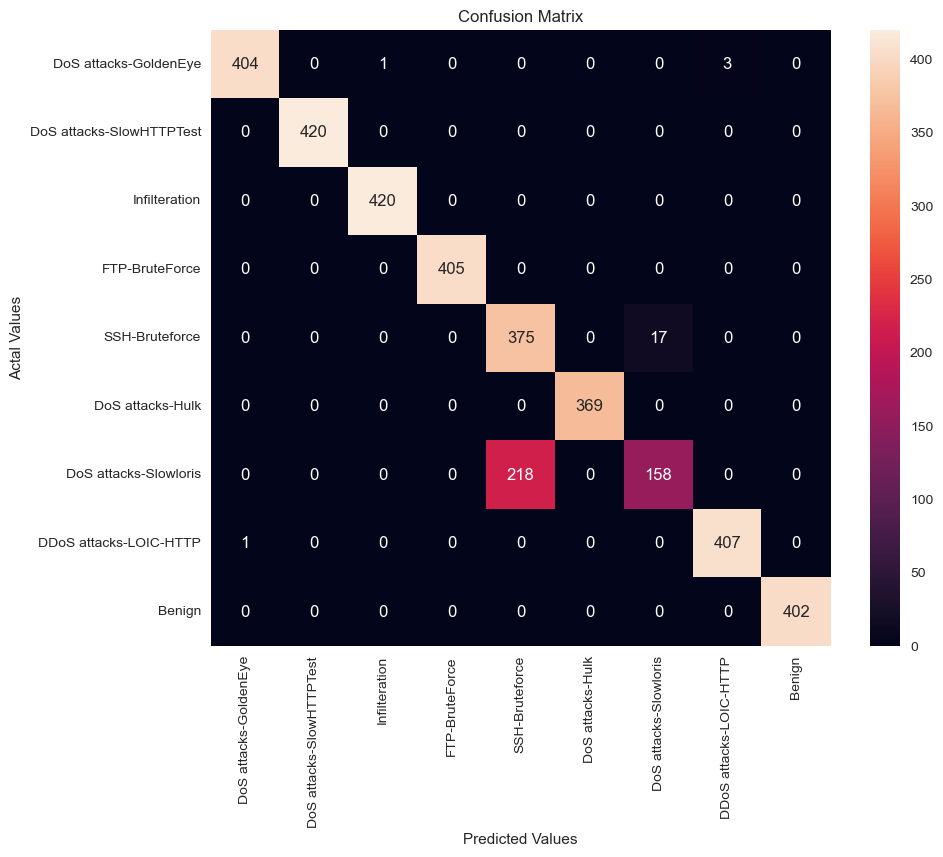

In [424]:
#Plotting the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm_df, annot=True,fmt=".0f")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()


In [425]:
from sklearn.neighbors import KNeighborsClassifier

In [426]:
knn_clf=OneVsRestClassifier(KNeighborsClassifier())
knn_clf.fit(X_train,y_train)
ypred=knn_clf.predict(X_test)
pred_prob = knn_clf.predict_proba(X_test)

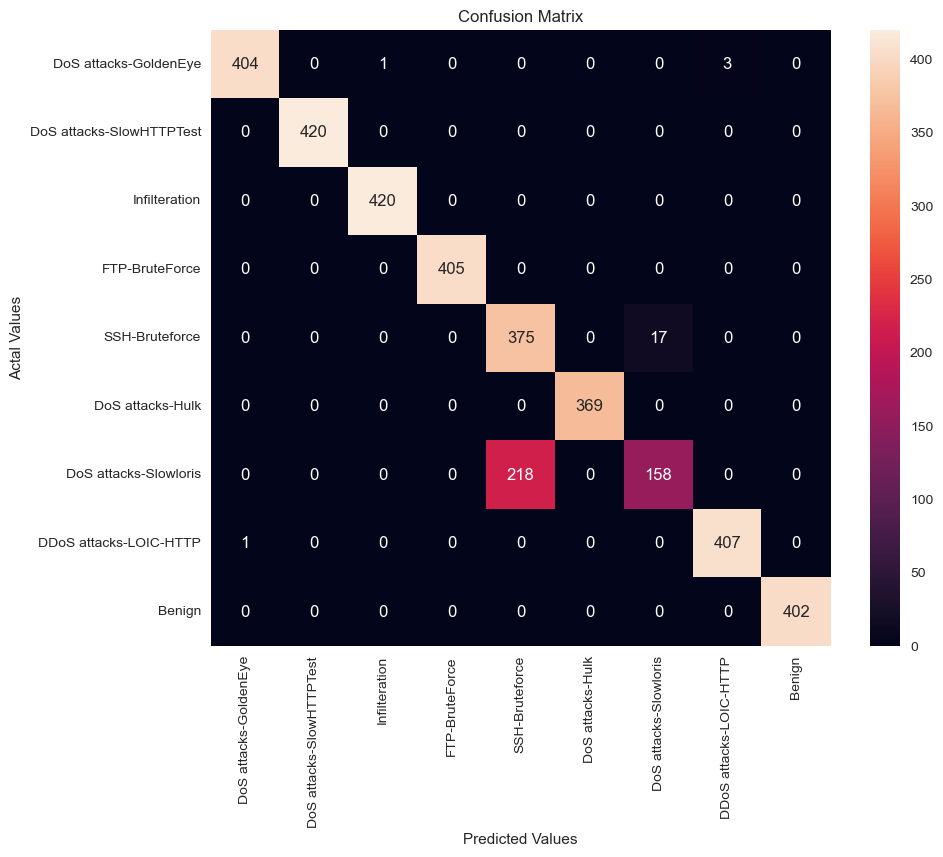

In [427]:
#Plotting the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm_df, annot=True,fmt=".0f")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show() 

In [428]:
# for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, ypred))

ACCURACY OF THE MODEL:  0.9305555555555556


In [429]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=target_names))

                          precision    recall  f1-score   support

   DoS attacks-GoldenEye       1.00      0.99      0.99       408
DoS attacks-SlowHTTPTest       1.00      1.00      1.00       420
           Infilteration       1.00      1.00      1.00       420
          FTP-BruteForce       1.00      1.00      1.00       405
          SSH-Bruteforce       0.63      0.96      0.76       392
        DoS attacks-Hulk       1.00      1.00      1.00       369
   DoS attacks-Slowloris       0.90      0.42      0.57       376
  DDoS attacks-LOIC-HTTP       0.99      1.00      1.00       408
                  Benign       1.00      1.00      1.00       402

                accuracy                           0.93      3600
               macro avg       0.95      0.93      0.92      3600
            weighted avg       0.95      0.93      0.93      3600



In [430]:
from sklearn.metrics import confusion_matrix,f1_score, precision_score,recall_score
cf_matrix =confusion_matrix(y_test,y_pred)

In [431]:
cf_matrix

array([[404,   0,   1,   0,   0,   0,   0,   3,   0],
       [  0, 420,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 420,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 405,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 375,   0,  17,   0,   0],
       [  0,   0,   0,   0,   0, 369,   0,   0,   0],
       [  0,   0,   0,   0, 218,   0, 158,   0,   0],
       [  1,   0,   0,   0,   0,   0,   0, 407,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 402]], dtype=int64)

In [432]:
import seaborn as sns
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cf_matrix,
                     index = ['DoS attacks-GoldenEye','DoS attacks-SlowHTTPTest','Infilteration','FTP-BruteForce','SSH-Bruteforce','DoS attacks-Hulk','DoS attacks-Slowloris','DDoS attacks-LOIC-HTTP','Benign'], 
                     columns = ['DoS attacks-GoldenEye','DoS attacks-SlowHTTPTest','Infilteration','FTP-BruteForce','SSH-Bruteforce','DoS attacks-Hulk','DoS attacks-Slowloris','DDoS attacks-LOIC-HTTP','Benign'])

C:\Users\SOUGATA\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


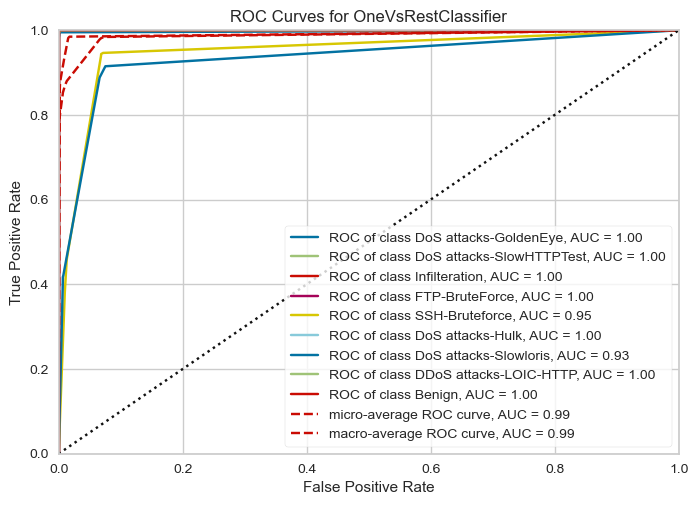

ROCAUC(ax=<AxesSubplot:title={'center':'ROC Curves for OneVsRestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       encoder={0: 'DoS attacks-GoldenEye', 1: 'DoS attacks-SlowHTTPTest',
                2: 'Infilteration', 3: 'FTP-BruteForce', 4: 'SSH-Bruteforce',
                5: 'DoS attacks-Hulk', 6: 'DoS attacks-Slowloris',
                7: 'DDoS attacks-LOIC-HTTP', 8: 'Benign'},
       estimator=OneVsRestClassifier(estimator=KNeighborsClassifier()))

In [433]:
plot_ROC_curve(knn_clf,X_train, y_train, X_test, y_test)

In [434]:
n_classes = 9

In [435]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsRestClassifier

In [436]:
# fit model
clf = OneVsRestClassifier(LogisticRegression())
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
pred_prob = clf.predict_proba(X_test)

C:\Users\SOUGATA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\SOUGATA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

In [437]:
from yellowbrick.classifier import *
#import ROCAUC

def plot_ROC_curve(model, xtrain, ytrain, xtest, ytest):

    # Creating visualization with the readable labels
    visualizer = ROCAUC(model, encoder={0:'DoS attacks-GoldenEye',1:'DoS attacks-SlowHTTPTest',2:'Infilteration',3:'FTP-BruteForce',4:'SSH-Bruteforce',5:'DoS attacks-Hulk',6:'DoS attacks-Slowloris',7:'DDoS attacks-LOIC-HTTP',
                                        8:'Benign' })
                                        
    # Fitting to the training data first then scoring with the test data                                    
    visualizer.fit(xtrain, ytrain)
    visualizer.score(xtest, ytest)
    visualizer.show()
    
    return visualizer

C:\Users\SOUGATA\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


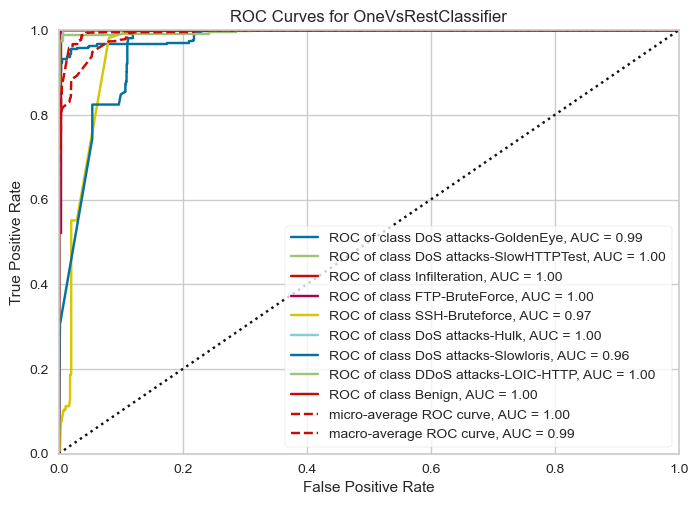

ROCAUC(ax=<AxesSubplot:title={'center':'ROC Curves for OneVsRestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       encoder={0: 'DoS attacks-GoldenEye', 1: 'DoS attacks-SlowHTTPTest',
                2: 'Infilteration', 3: 'FTP-BruteForce', 4: 'SSH-Bruteforce',
                5: 'DoS attacks-Hulk', 6: 'DoS attacks-Slowloris',
                7: 'DDoS attacks-LOIC-HTTP', 8: 'Benign'},
       estimator=OneVsRestClassifier(estimator=LogisticRegression()))

In [438]:
plot_ROC_curve(clf,X_train, y_train, X_test, y_test)

In [439]:
# for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

ACCURACY OF THE MODEL:  0.9333333333333333


In [440]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred,target_names=target_names))

                          precision    recall  f1-score   support

   DoS attacks-GoldenEye       1.00      0.99      0.99       408
DoS attacks-SlowHTTPTest       1.00      1.00      1.00       420
           Infilteration       1.00      1.00      1.00       420
          FTP-BruteForce       1.00      1.00      1.00       405
          SSH-Bruteforce       0.63      0.96      0.76       392
        DoS attacks-Hulk       1.00      1.00      1.00       369
   DoS attacks-Slowloris       0.90      0.42      0.57       376
  DDoS attacks-LOIC-HTTP       0.99      1.00      1.00       408
                  Benign       1.00      1.00      1.00       402

                accuracy                           0.93      3600
               macro avg       0.95      0.93      0.92      3600
            weighted avg       0.95      0.93      0.93      3600



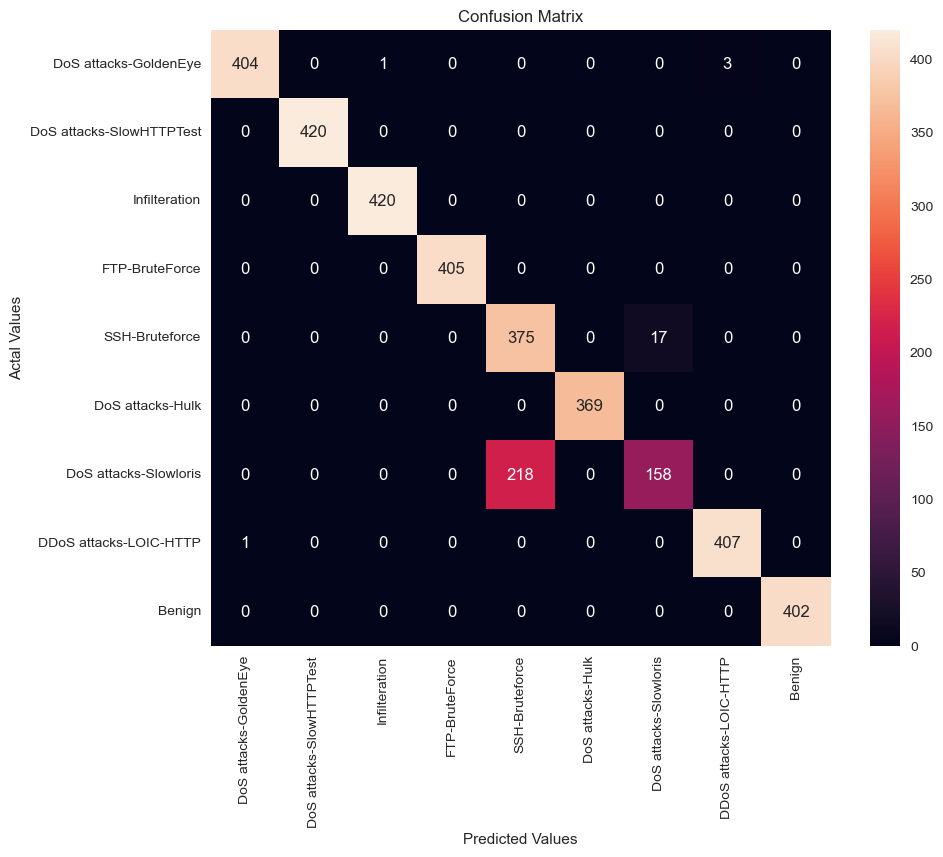

In [441]:
#Plotting the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm_df, annot=True,fmt=".0f")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show() 

In [442]:
#Prediction using XGBoost
from xgboost import XGBClassifier
xgb = OneVsRestClassifier(XGBClassifier())
xgb.fit(X_train, y_train)
pred = xgb.predict(X_test)
pred_prob = xgb.predict_proba(X_test)

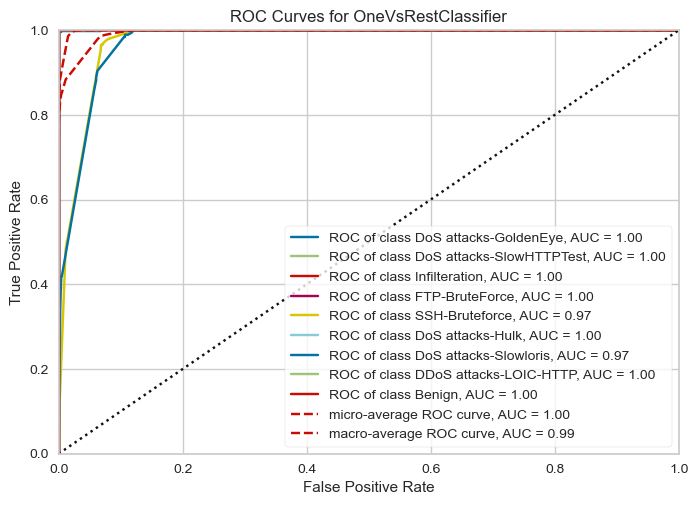

ROCAUC(ax=<AxesSubplot:title={'center':'ROC Curves for OneVsRestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       encoder={0: 'DoS attacks-GoldenEye', 1: 'DoS attacks-SlowHTTPTest',
                2: 'Infilteration', 3: 'FTP-BruteForce', 4: 'SSH-Bruteforce',
                5: 'DoS attacks-Hulk', 6: 'DoS attacks-Slowloris',
                7: 'DDoS attacks-LOIC-HTTP', 8: 'Benign'},
       estimator=OneVsRestCl...
                                                             grow_policy=None,
                                                             importance_type=None,
                                                             interaction_constraints=None,
                                                             learning_rate=None,
                                                             max_bin=None,
                                                             max_cat_to_onehot=None,
                                                             max_delta_step=None,
                                                             max_depth=None,
                                                             max_leaves=None,
                                                             min_child_weight=None,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             n_estimators=100,
                                                             n_jobs=None,
                                                             num_parallel_tree=None,
                                                             predictor=None,
                                                             random_state=None,
                                                             reg_alpha=None,
                                                             reg_lambda=None, ...)))

In [443]:
plot_ROC_curve(xgb,X_train, y_train, X_test, y_test)  

In [444]:
# for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, pred))

ACCURACY OF THE MODEL:  0.9333333333333333


In [445]:
print(classification_report(y_test, pred, target_names=target_names))

                          precision    recall  f1-score   support

   DoS attacks-GoldenEye       1.00      0.99      0.99       408
DoS attacks-SlowHTTPTest       1.00      1.00      1.00       420
           Infilteration       1.00      1.00      1.00       420
          FTP-BruteForce       1.00      1.00      1.00       405
          SSH-Bruteforce       0.63      0.96      0.76       392
        DoS attacks-Hulk       1.00      1.00      1.00       369
   DoS attacks-Slowloris       0.90      0.42      0.57       376
  DDoS attacks-LOIC-HTTP       0.99      1.00      1.00       408
                  Benign       1.00      1.00      1.00       402

                accuracy                           0.93      3600
               macro avg       0.95      0.93      0.92      3600
            weighted avg       0.95      0.93      0.93      3600



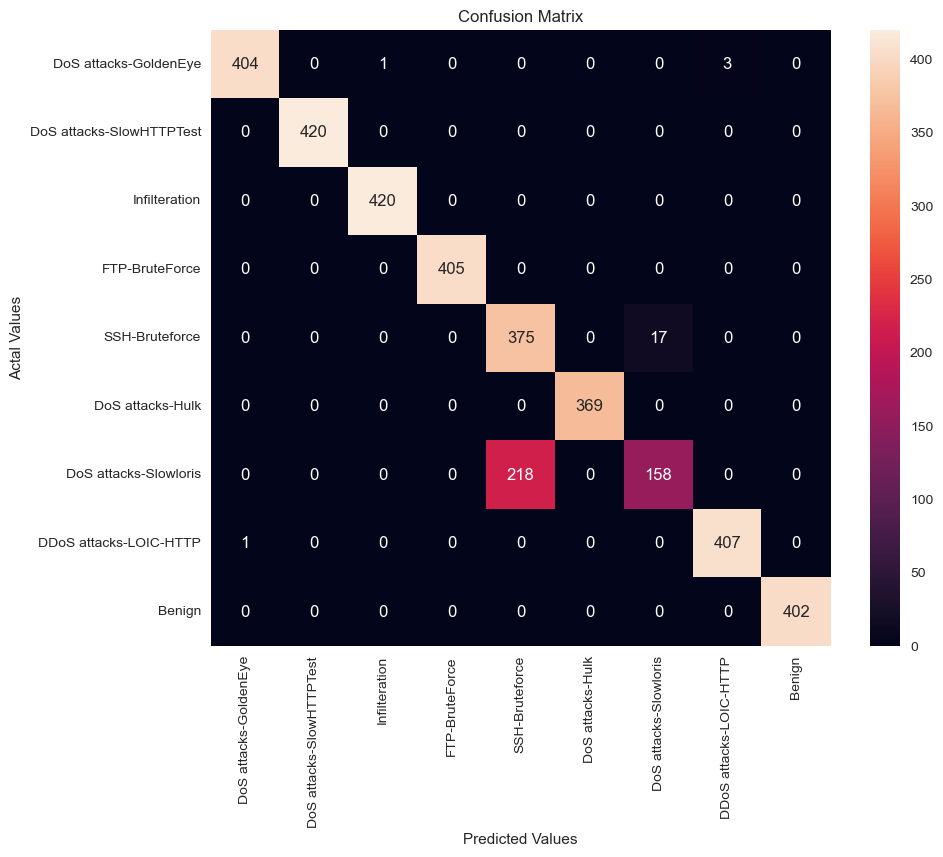

In [446]:
#Plotting the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm_df, annot=True,fmt=".0f")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show() 

In [447]:
#NaiveBayes
from sklearn.naive_bayes import GaussianNB
nb = OneVsRestClassifier(GaussianNB())
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

In [448]:
print(classification_report(y_test, y_pred, target_names=target_names))

                          precision    recall  f1-score   support

   DoS attacks-GoldenEye       0.76      0.73      0.75       408
DoS attacks-SlowHTTPTest       1.00      1.00      1.00       420
           Infilteration       0.67      0.95      0.79       420
          FTP-BruteForce       0.68      0.52      0.59       405
          SSH-Bruteforce       0.69      0.56      0.62       392
        DoS attacks-Hulk       0.71      0.96      0.82       369
   DoS attacks-Slowloris       0.62      0.74      0.67       376
  DDoS attacks-LOIC-HTTP       0.80      0.43      0.56       408
                  Benign       1.00      1.00      1.00       402

                accuracy                           0.77      3600
               macro avg       0.77      0.77      0.75      3600
            weighted avg       0.77      0.77      0.76      3600



C:\Users\SOUGATA\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


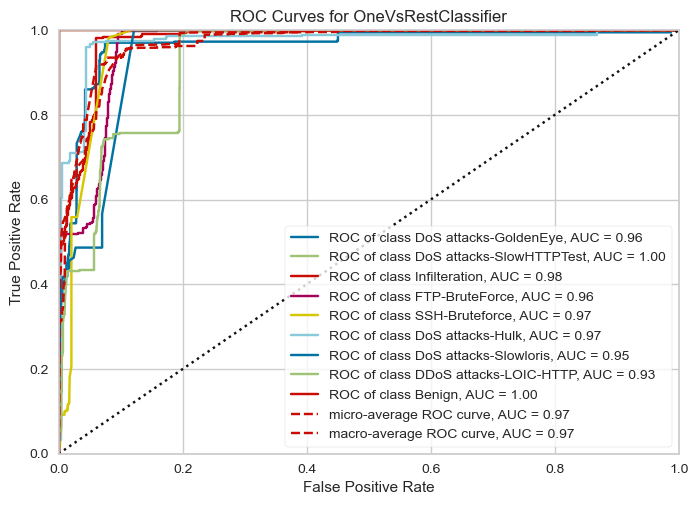

ROCAUC(ax=<AxesSubplot:title={'center':'ROC Curves for OneVsRestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       encoder={0: 'DoS attacks-GoldenEye', 1: 'DoS attacks-SlowHTTPTest',
                2: 'Infilteration', 3: 'FTP-BruteForce', 4: 'SSH-Bruteforce',
                5: 'DoS attacks-Hulk', 6: 'DoS attacks-Slowloris',
                7: 'DDoS attacks-LOIC-HTTP', 8: 'Benign'},
       estimator=OneVsRestClassifier(estimator=GaussianNB()))

In [449]:
plot_ROC_curve(nb,X_train, y_train, X_test, y_test) 

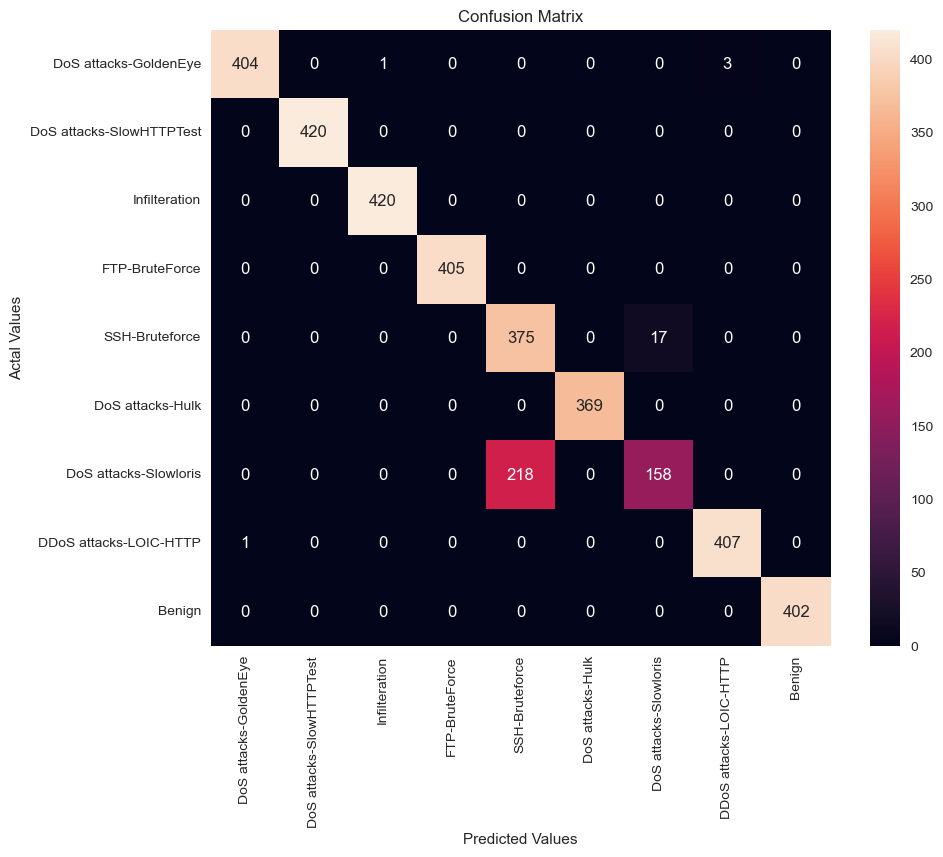

In [450]:
#Plotting the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm_df, annot=True,fmt=".0f")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show() 

In [451]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.tree import DecisionTreeClassifier  
# create a regressor object

In [460]:
from sklearn.multiclass import OneVsRestClassifier
dt=OneVsRestClassifier(DecisionTreeClassifier())
dt.fit(X_train,y_train)
ypred=dt.predict(X_test)


In [461]:
dt.fit(X_train,y_train)

OneVsRestClassifier(estimator=DecisionTreeClassifier())

In [462]:
from sklearn import metrics 
# for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, ypred))

ACCURACY OF THE MODEL:  0.9288888888888889


In [463]:
from sklearn.metrics import classification_report

In [464]:
print(classification_report(y_test, ypred, target_names=target_names))

                          precision    recall  f1-score   support

   DoS attacks-GoldenEye       1.00      0.98      0.99       408
DoS attacks-SlowHTTPTest       1.00      1.00      1.00       420
           Infilteration       1.00      0.99      1.00       420
          FTP-BruteForce       1.00      1.00      1.00       405
          SSH-Bruteforce       0.63      0.95      0.76       392
        DoS attacks-Hulk       1.00      1.00      1.00       369
   DoS attacks-Slowloris       0.89      0.42      0.57       376
  DDoS attacks-LOIC-HTTP       0.99      0.99      0.99       408
                  Benign       0.97      1.00      0.98       402

                accuracy                           0.93      3600
               macro avg       0.94      0.93      0.92      3600
            weighted avg       0.94      0.93      0.92      3600



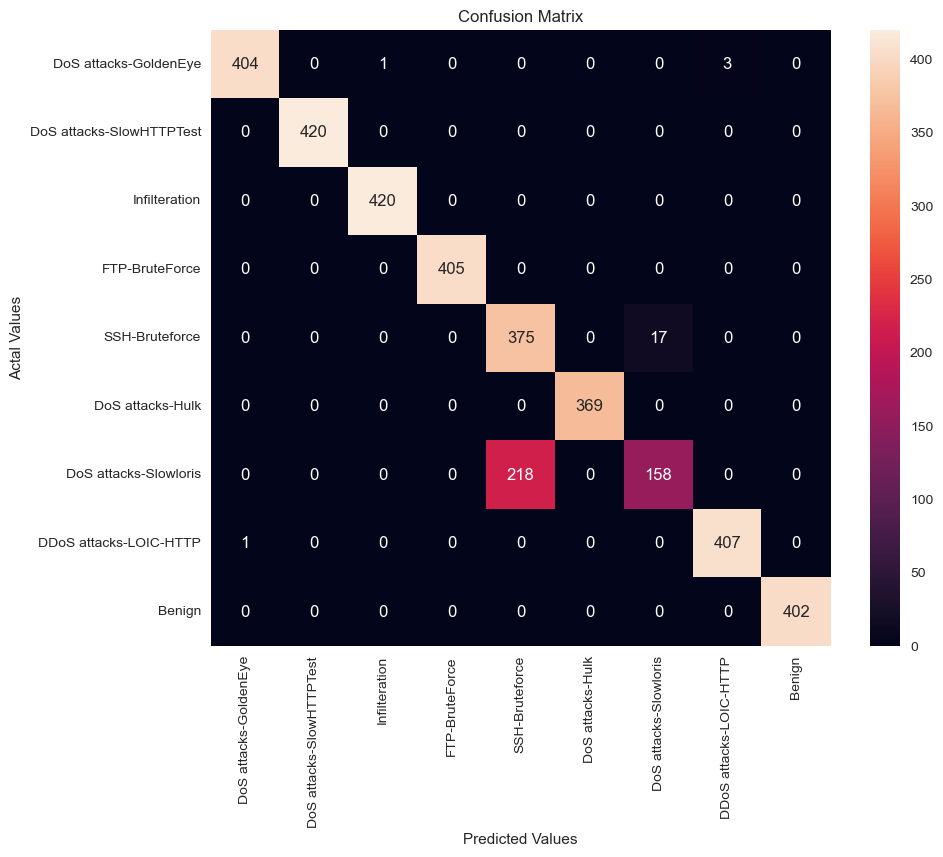

In [472]:
#Plotting the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm_df, annot=True,fmt=".0f")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show() 